In [252]:
!pip install yfinance  
from datetime import datetime  
import pandas as pd  
import matplotlib.pyplot as plt  
import numpy as np  
import yfinance as yf  
from scipy.stats import pearsonr  
from numpy import mean  
from numpy import std  
from statsmodels.tsa.stattools import coint, adfuller  
import seaborn as sns

In [253]:
s="2022-01-01"
e="2023-01-01"

In [254]:
data = yf.download('HDFC.NS', start=s, end=e)
data1 = yf.download('HDFCBANK.NS', start=s, end=e)  
data2 = yf.download('ICICIBANK.NS', start=s, end=e)  
data3 = yf.download('KOTAKBANK.NS', start=s, end=e)  
data4 = yf.download('INDUSINDBK.NS', start=s, end=e)  
data5 = yf.download('AXISBANK.NS',start=s, end=e)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [255]:
x= ["HDFC", "HDFCBK", "ICICIBK", "KOTAKBK", "INDUSINDBK", "AXISBK"]  
prices_df = pd.DataFrame({"HDFC": data["Close"], "HDFCBK": data1["Close"], 
                          "ICICIBK": data2["Close"], "KOTAKBK": data3["Close"], 
                          "INDUSINDBK": data4["Close"],   "AXISBK": data5["Close"]})  

In [256]:
prices_df.head()

,HDFC,HDFCBK,ICICIBK,KOTAKBK,INDUSINDBK,AXISBK
Date,,,,,,
2022-01-03,2636.399902,1519.650024,764.700012,1824.449951,912.299988,696.349976
2022-01-04,2675.300049,1528.550049,772.849976,1852.599976,904.400024,709.150024
2022-01-05,2673.649902,1564.849976,788.049988,1922.150024,903.950012,726.900024
2022-01-06,2620.399902,1539.750000,785.049988,1891.900024,921.700012,730.299988
2022-01-07,2596.699951,1550.550049,793.250000,1904.250000,922.250000,730.599976


In [257]:
hdfc=prices_df[['HDFC']]

In [258]:
hdfc.head()

,HDFC
Date,
2022-01-03,2636.399902
2022-01-04,2675.300049
2022-01-05,2673.649902
2022-01-06,2620.399902
2022-01-07,2596.699951


In [259]:
hdfc['mean']=hdfc['HDFC'].rolling(20).mean()

/var/folders/w6/74cfcntj5pdb23tt1nlz5tkh0000gn/T/ipykernel_53616/618001597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdfc['mean']=hdfc['HDFC'].rolling(20).mean()


<Axes: xlabel='Date'>

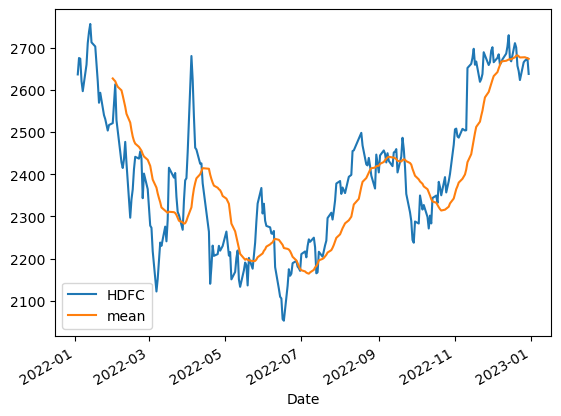

In [260]:
hdfc.plot()

In [261]:
stdev=hdfc['HDFC'].rolling(20).std()

In [262]:
hdfc['2stdev']=hdfc['mean']+(2*stdev)
hdfc['-2stdev']=hdfc['mean']-(2*stdev)


/var/folders/w6/74cfcntj5pdb23tt1nlz5tkh0000gn/T/ipykernel_53616/4089070378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdfc['2stdev']=hdfc['mean']+(2*stdev)
/var/folders/w6/74cfcntj5pdb23tt1nlz5tkh0000gn/T/ipykernel_53616/4089070378.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hdfc['-2stdev']=hdfc['mean']-(2*stdev)


<Axes: xlabel='Date'>

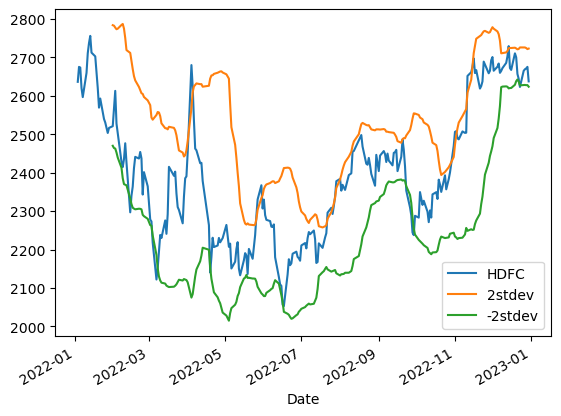

In [263]:
hdfc[['HDFC','2stdev','-2stdev']].plot()

In [264]:
(hdfc['HDFC'] <= hdfc['-2stdev']).unique()

array([False,  True])

In [265]:
hdfc=hdfc.reset_index()

In [266]:
hdfc.head()

,Date,HDFC,mean,2stdev,-2stdev
0,2022-01-03,2636.399902,NaN,NaN,NaN
1,2022-01-04,2675.300049,NaN,NaN,NaN
2,2022-01-05,2673.649902,NaN,NaN,NaN
3,2022-01-06,2620.399902,NaN,NaN,NaN
4,2022-01-07,2596.699951,NaN,NaN,NaN


In [267]:
hdfc=hdfc.iloc[20:]
hdfc.head()

,Date,HDFC,mean,2stdev,-2stdev
20,2022-02-01,2565.350098,2623.344995,2782.572176,2464.117814
21,2022-02-02,2612.949951,2620.227490,2777.602339,2462.852641
22,2022-02-03,2527.800049,2612.934998,2773.373721,2452.496274
23,2022-02-04,2503.250000,2607.077502,2774.759308,2439.395697
24,2022-02-07,2428.149902,2598.650000,2784.487269,2412.812731


In [268]:
i=0
buy_signals=[]
sell_signals=[]

buy_price=[]
sell_price=[]

for j in range(len(hdfc)): 
    if hdfc['HDFC'].iloc[j]<hdfc['-2stdev'].iloc[j] and i!=-1:
        buy_signals.append(hdfc['HDFC'].iloc[j])
        sell_signals.append(float('nan'))
        buy_price.append(hdfc['HDFC'].iloc[j])
        
        i=-1
       
    elif hdfc['HDFC'].iloc[j]>hdfc['2stdev'].iloc[j] and i!=1:
        sell_signals.append(hdfc['HDFC'].iloc[j])
        buy_signals.append(float('nan'))
        sell_price.append(hdfc['HDFC'].iloc[j])
        
        i=1
        

    else:
        buy_signals.append(float('nan'))
        sell_signals.append(float('nan'))
    
    
    
hdfc['Buy']=buy_signals
hdfc['Sell']=sell_signals


m=min(len(buy_price),len(sell_price))
p=0
for i in range(m):
    p=p+(sell_price[i]-buy_price[i])
    i+1
print('Profit/Equity Share = INR ',p)
    


Profit/Equity Share = INR  886.800048828125


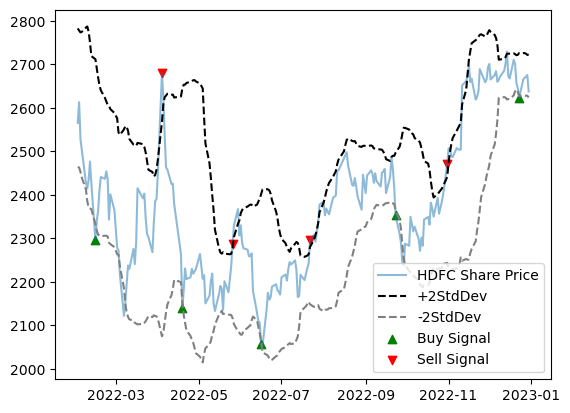

In [269]:
hdfc=hdfc.set_index('Date')
plt.plot(hdfc['HDFC'],label='HDFC Share Price',alpha=0.5)
plt.plot(hdfc['2stdev'],label='+2StdDev',color='black',linestyle='--')
plt.plot(hdfc['-2stdev'],label='-2StdDev',color='grey',linestyle='--')
plt.scatter(hdfc.index,hdfc['Buy'],label='Buy Signal',marker='^',color='green')
plt.scatter(hdfc.index,hdfc['Sell'],label='Sell Signal',marker='v',color='red')
plt.legend(loc='lower right')
plt.show();
